In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/predict-people-personality-types/data.csv")

In [3]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [4]:
data.nunique()

Age                       39
Gender                     2
Education                  2
Introversion Score    120205
Sensing Score         128054
Thinking Score        120122
Judging Score         127724
Interest                   5
Personality               16
dtype: int64

In [5]:
data.shape

(128061, 9)

In [6]:
data.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [7]:
dummy_data = data.loc[data['Interest'] == 'Unknown']

In [8]:
dummy_data.shape

(48835, 9)

In [9]:
data.loc[data['Interest'] == 'Unknown', 'Interest'] = 'Others'

In [10]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Others,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Others,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [11]:
data['Age'] = data['Age'].astype(int)

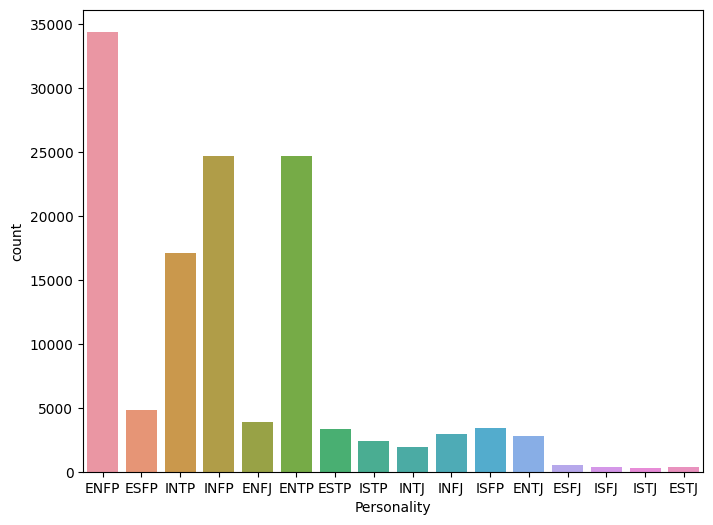

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='Personality',data=data)
plt.show()

In [13]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19,Male,0,9.47080,7.141434,6.03696,4.360278,Others,ENFP
1,27,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21,Female,0,7.08615,3.388433,2.66188,5.127320,Others,ENFP
3,28,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


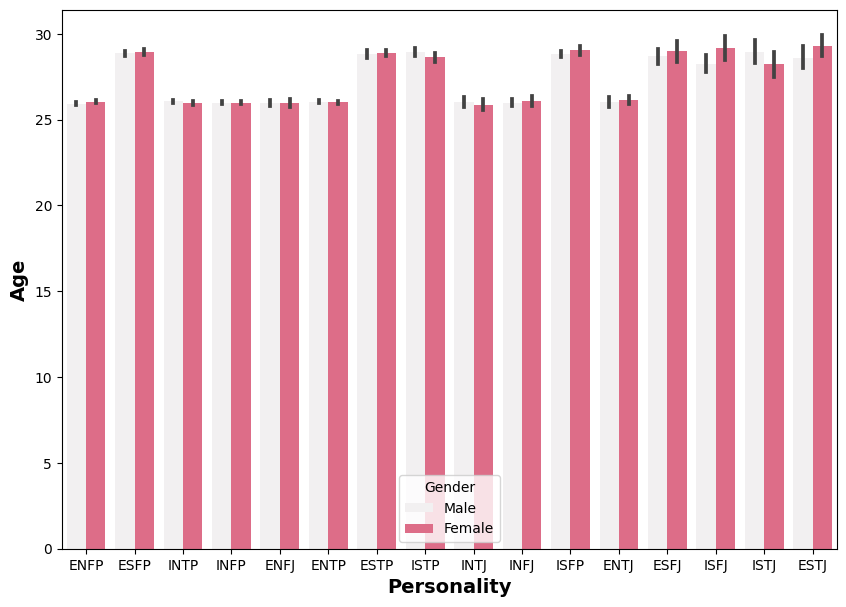

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(x='Personality',y='Age',data=data,color='#F05A7E',hue='Gender')
plt.xlabel('Personality', fontsize=14, fontweight='bold')
plt.ylabel('Age', fontsize=14, fontweight='bold') 
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def convert_categorical_to_continuous(data, column_names):
    copy_data = data.copy()  # Create a copy to avoid modifying the original DataFrame
    le = LabelEncoder()
    for column_name in column_names:
        copy_data[column_name] = le.fit_transform(copy_data[column_name])
    return copy_data
data = convert_categorical_to_continuous(data, ['Gender', 'Interest', 'Personality'])

In [16]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19,1,0,9.47080,7.141434,6.03696,4.360278,1,1
1,27,0,0,5.85392,6.160195,0.80552,4.221421,2,5
2,21,0,0,7.08615,3.388433,2.66188,5.127320,1,1
3,28,1,0,2.01892,4.823624,7.30625,5.986550,1,11
4,36,0,1,9.91703,4.755080,5.31469,4.677213,3,1


In [17]:
data.dtypes

Age                     int64
Gender                  int64
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest                int64
Personality             int64
dtype: object

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Personality'], axis=1),
    data['Personality'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((89642, 8), (38419, 8))

In [20]:
print(X_train.shape)
print(X_test.shape)

(89642, 8)
(38419, 8)


## Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.8196985866368203


In [25]:
## svm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predict the tset set result

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[ 882  179   24    0   44    7    1    0   61    8    1    0    2    1
     0    0]
 [  52 9106    0  208    1  306    0    7    5  535    0   13    0   18
     0    0]
 [  22    2  600  119    0    0   17    5    0    0   26    8    0    0
     2    0]
 [   4  253   41 6454    0    7    0  201    0   13    8  422    0    0
     1   10]
 [  48    8    1    0   81   14    0    0    1    0    0    0    7    1
     0    0]
 [   4  438    0   15    2  866    0   18    0   25    0    0    2   57
     0    4]
 [   1    0   34    1    1    0   68    6    0    0    0    0    0    0
     3    0]
 [   0   10    3  325    0   20    2  557    0    2    0   12    0    0
     4   38]
 [  65   13    0    0    2    0    0    0  716  105   19    0   14    3
     0    0]
 [   2  599    0    8    0   18    0    0   68 6484    1  140    1  205
     0    2]
 [   0    0   41    9    0    0    2    0   15    2  412   85    0    1
    15    0]
 [   1   16    5  371    0    0    0    9    3  175   28 4346    

In [28]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.8224836669356308


## Training the K-NN model on the Training set

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import  accuracy_score
acc3 = accuracy_score(y_test, y_pred)

In [32]:
print(f"Accuracy score: {acc3}")

Accuracy score: 0.8144407714932715


## Training the Naive Bayes on the Training set

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import  accuracy_score
acc4 = accuracy_score(y_test, y_pred)

In [36]:
print(f"Accuracy score : {acc4}")

Accuracy score : 0.5967359900049455


## Training Decision Tree Classification on Train set

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import  accuracy_score
acc5 = accuracy_score(y_test, y_pred)

In [40]:
print(f"Accuracy score: {acc5}")

Accuracy score: 0.8778729274577682


In [41]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


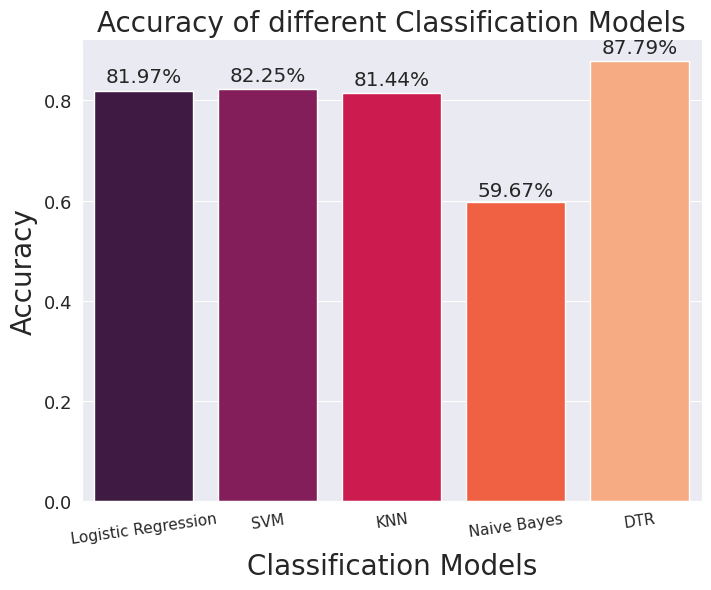

In [42]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Notebook Overview and Notes

<h5>I have not provided detailed explanations within this notebook. If there are any questions or if clarification is needed, please feel free to ask.</h5>

<h5>Regarding the model development process, I initially applied feature selection techniques. However, the resulting accuracy was lower than expected. Consequently, I proceeded with the model training and evaluation without applying feature selection.</h5>